# Mortgage-Backed Securities

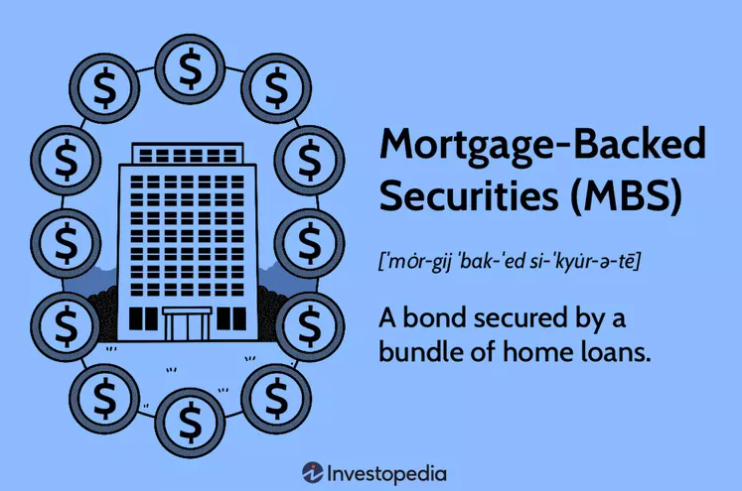

Aim of the project: To predict the Mortgage Backed Securities prepayment risk using machine learning models. Breakdown of the Problem Statement:

Supervised machine learning problem.
Problem Statement:
The data is obtained from Freddie Mac official portal for home loans. The size of the home loans data is (291452 x 28). It contains 291452 data points and 28 columns or parameters which denote different features of the data.

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import datetime

In [ ]:
df=pd.read_csv('LoanExport.csv')

In [ ]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,52.0
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0.0,0.0,144.0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,67.0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0.0,0.0,35.0
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,607,199903,X,202902,19660,25,1,O,87,14,...,32100,F199Q1161439,N,360,1,NaN,BANKOFAMERICANA,1.0,1.0,84.0
8284,607,199903,X,202902,20764,17,1,O,78,34,...,8000,F199Q1005706,N,360,2,NaN,NATLCITYMTGECO,1.0,1.0,45.0
8285,607,199903,X,202902,21660,25,1,O,88,23,...,97400,F199Q1240894,N,360,2,Ot,Other servicers,0.0,0.0,45.0
8286,607,199903,X,202902,23104,12,1,O,85,26,...,76000,F199Q1248655,N,360,2,HO,HOMESIDELENDINGINC,0.0,0.0,44.0


In [ ]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,52.0
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0.0,0.0,144.0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,67.0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0.0,0.0,35.0
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0.0,0.0,54.0


In [ ]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PostalCode,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8288.000000,8287.000000,8287.000000,8287.000000
mean,497.931226,199904.920125,202901.307915,12.749035,1.029199,80.860763,29.553571,121071.790541,80.845922,7.053185,53255.091699,359.702461,0.440087,6.433088,63.205623
std,205.132493,12.703044,24.739000,13.259903,0.208117,13.005811,13.156933,52854.719458,13.010259,0.440372,30311.163141,3.006374,0.496427,16.473469,50.595431
min,0.000000,199902.000000,202409.000000,0.000000,1.000000,7.000000,0.000000,13000.000000,7.000000,4.875000,600.000000,306.000000,0.000000,0.000000,1.000000
25%,552.000000,199903.000000,202902.000000,0.000000,1.000000,75.000000,22.000000,80000.000000,75.000000,6.875000,29500.000000,360.000000,0.000000,0.000000,33.000000
50%,584.000000,199904.000000,202903.000000,12.000000,1.000000,80.000000,31.000000,115000.000000,80.000000,7.000000,48300.000000,360.000000,0.000000,0.000000,49.000000
75%,599.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,154250.000000,90.000000,7.250000,84100.000000,360.000000,1.000000,4.000000,69.000000
max,607.000000,200304.000000,203010.000000,52.000000,4.000000,103.000000,65.000000,400000.000000,100.000000,9.750000,99700.000000,360.000000,1.000000,180.000000,212.000000


In [ ]:
df.shape

(8288, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8288 non-null   int64  
 1   FirstPaymentDate    8288 non-null   int64  
 2   FirstTimeHomebuyer  8288 non-null   object 
 3   MaturityDate        8288 non-null   int64  
 4   MSA                 8288 non-null   object 
 5   MIP                 8288 non-null   int64  
 6   Units               8288 non-null   int64  
 7   Occupancy           8288 non-null   object 
 8   OCLTV               8288 non-null   int64  
 9   DTI                 8288 non-null   int64  
 10  OrigUPB             8288 non-null   int64  
 11  LTV                 8288 non-null   int64  
 12  OrigInterestRate    8288 non-null   float64
 13  Channel             8288 non-null   object 
 14  PPM                 8288 non-null   object 
 15  ProductType         8288 non-null   object 
 16  Proper

In [ ]:
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100,"\n\n")

SellerName            782
MonthsInRepayment       1
MonthsDelinquent        1
EverDelinquent          1
ServicerName            1
FirstPaymentDate        0
NumBorrowers            0
OrigLoanTerm            0
LoanPurpose             0
LoanSeqNum              0
PostalCode              0
PropertyType            0
PropertyState           0
ProductType             0
CreditScore             0
Channel                 0
OrigInterestRate        0
LTV                     0
OrigUPB                 0
DTI                     0
OCLTV                   0
Occupancy               0
Units                   0
MIP                     0
MSA                     0
MaturityDate            0
FirstTimeHomebuyer      0
PPM                     0
dtype: int64 

 CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units                 0.000000
Occupancy             0.000000
OCLTV   

In [ ]:
print("Seller Name:\n", df.SellerName.value_counts(), "\n\n")

Seller Name:
 Ot    2170
NO     866
ST     633
FI     627
FL     474
GM     346
CO     327
BA     294
WA     292
FT     249
BI     202
PR     170
OL     167
CH     165
PN     141
AC     120
HO     110
CR      78
G       42
RE      33
Name: SellerName, dtype: int64 




In [ ]:
df['SellerName'] = df['SellerName'].fillna(
df['SellerName'].dropna().mode().values[0])
#checking if we filled missing values
df['SellerName'].isnull().sum(),df['SellerName'].isnull().sum()

(0, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8288 non-null   int64  
 1   FirstPaymentDate    8288 non-null   int64  
 2   FirstTimeHomebuyer  8288 non-null   object 
 3   MaturityDate        8288 non-null   int64  
 4   MSA                 8288 non-null   object 
 5   MIP                 8288 non-null   int64  
 6   Units               8288 non-null   int64  
 7   Occupancy           8288 non-null   object 
 8   OCLTV               8288 non-null   int64  
 9   DTI                 8288 non-null   int64  
 10  OrigUPB             8288 non-null   int64  
 11  LTV                 8288 non-null   int64  
 12  OrigInterestRate    8288 non-null   float64
 13  Channel             8288 non-null   object 
 14  PPM                 8288 non-null   object 
 15  ProductType         8288 non-null   object 
 16  Proper

In [ ]:
num = df.select_dtypes('number').columns.to_list()
cat = df.select_dtypes('object').columns.to_list()

In [ ]:
num

['CreditScore',
 'FirstPaymentDate',
 'MaturityDate',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'PostalCode',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']

In [ ]:
cat


['FirstTimeHomebuyer',
 'MSA',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'LoanSeqNum',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName']

In [ ]:
len(num)

15

In [ ]:
len(cat)

13

In [ ]:
[df[category].value_counts() for category in cat]

[N    4722
 X    2474
 Y    1092
 Name: FirstTimeHomebuyer, dtype: int64,
 X        1194
 16974     290
 31084     286
 35644     235
 12060     193
          ... 
 31180       1
 25500       1
 10180       1
 31900       1
 27780       1
 Name: MSA, Length: 354, dtype: int64,
 O    7982
 I     178
 S     128
 Name: Occupancy, dtype: int64,
 R    4202
 T    4068
 C      16
 B       2
 Name: Channel, dtype: int64,
 N    8041
 X     184
 Y      63
 Name: PPM, dtype: int64,
 FRM      8288
 Name: ProductType, dtype: int64,
 CA    1112
 FL     626
 MI     442
 IL     429
 TX     400
 NJ     316
 OH     310
 NY     310
 NC     298
 AZ     287
 WA     281
 GA     264
 PA     242
 CO     224
 IN     187
 VA     179
 MD     178
 MA     166
 SC     158
 OR     158
 MN     139
 WI     138
 UT     134
 NV     118
 MO     118
 CT     107
 TN      99
 KY      93
 AL      93
 LA      75
 ID      62
 PR      54
 IA      50
 KS      44
 NM      42
 OK      41
 NH      37
 AR      37
 MS      30
 NE    

## Categarical Columns

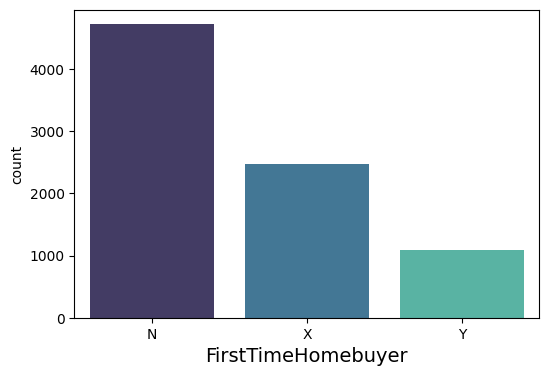

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='FirstTimeHomebuyer' , data=df ,palette='mako')
plt.xlabel('FirstTimeHomebuyer', fontsize=14)
plt.show()

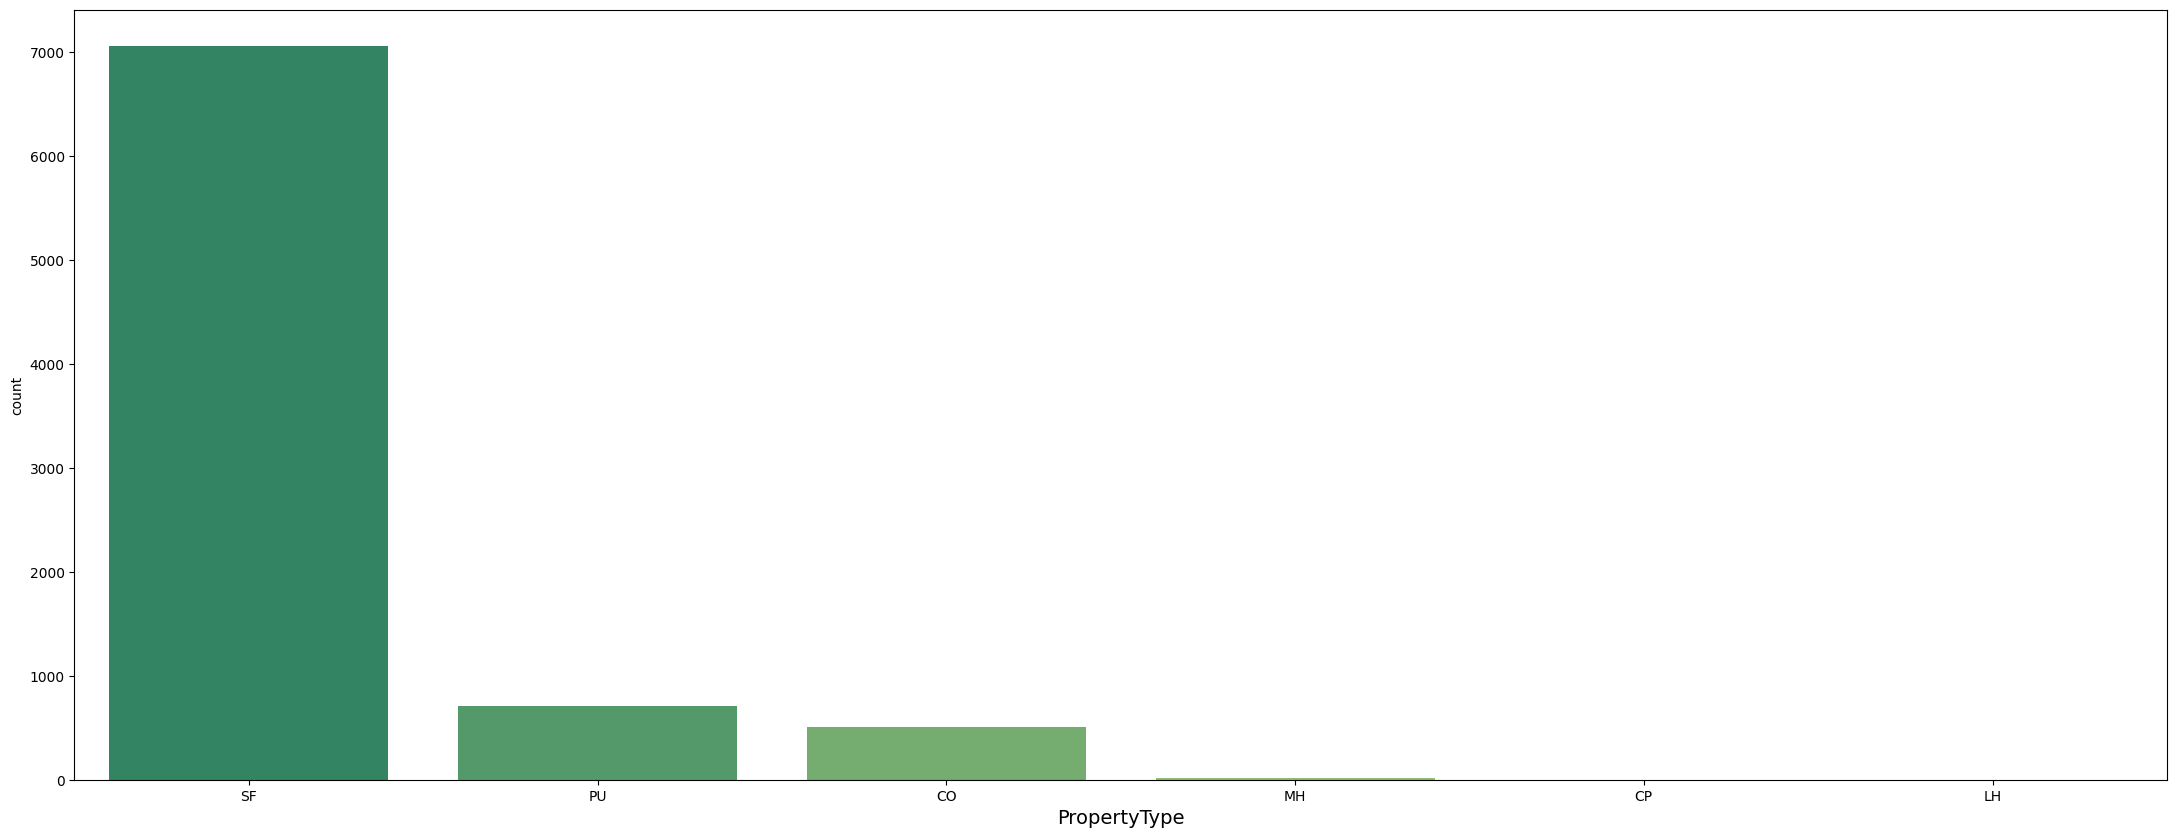

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='PropertyType' , data=df ,palette='summer')
plt.xlabel('PropertyType', fontsize=14)
plt.show()

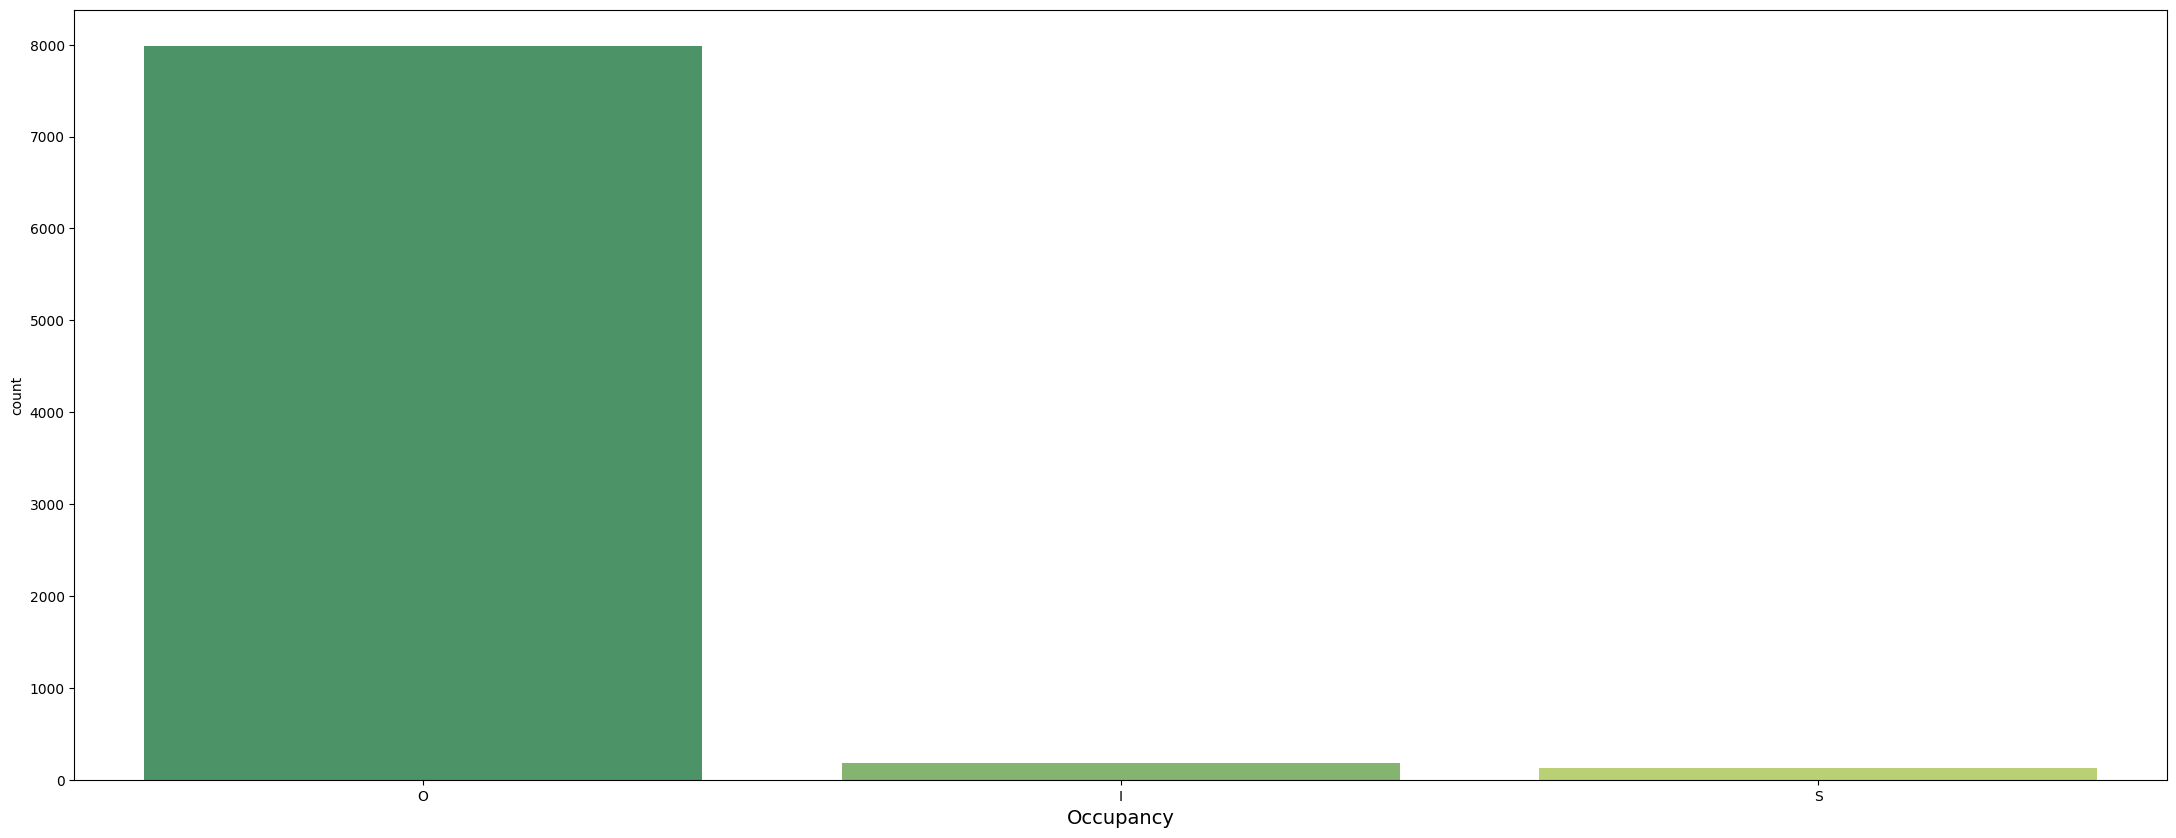

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='Occupancy' , data=df ,palette='summer')
plt.xlabel('Occupancy', fontsize=14)
plt.show()

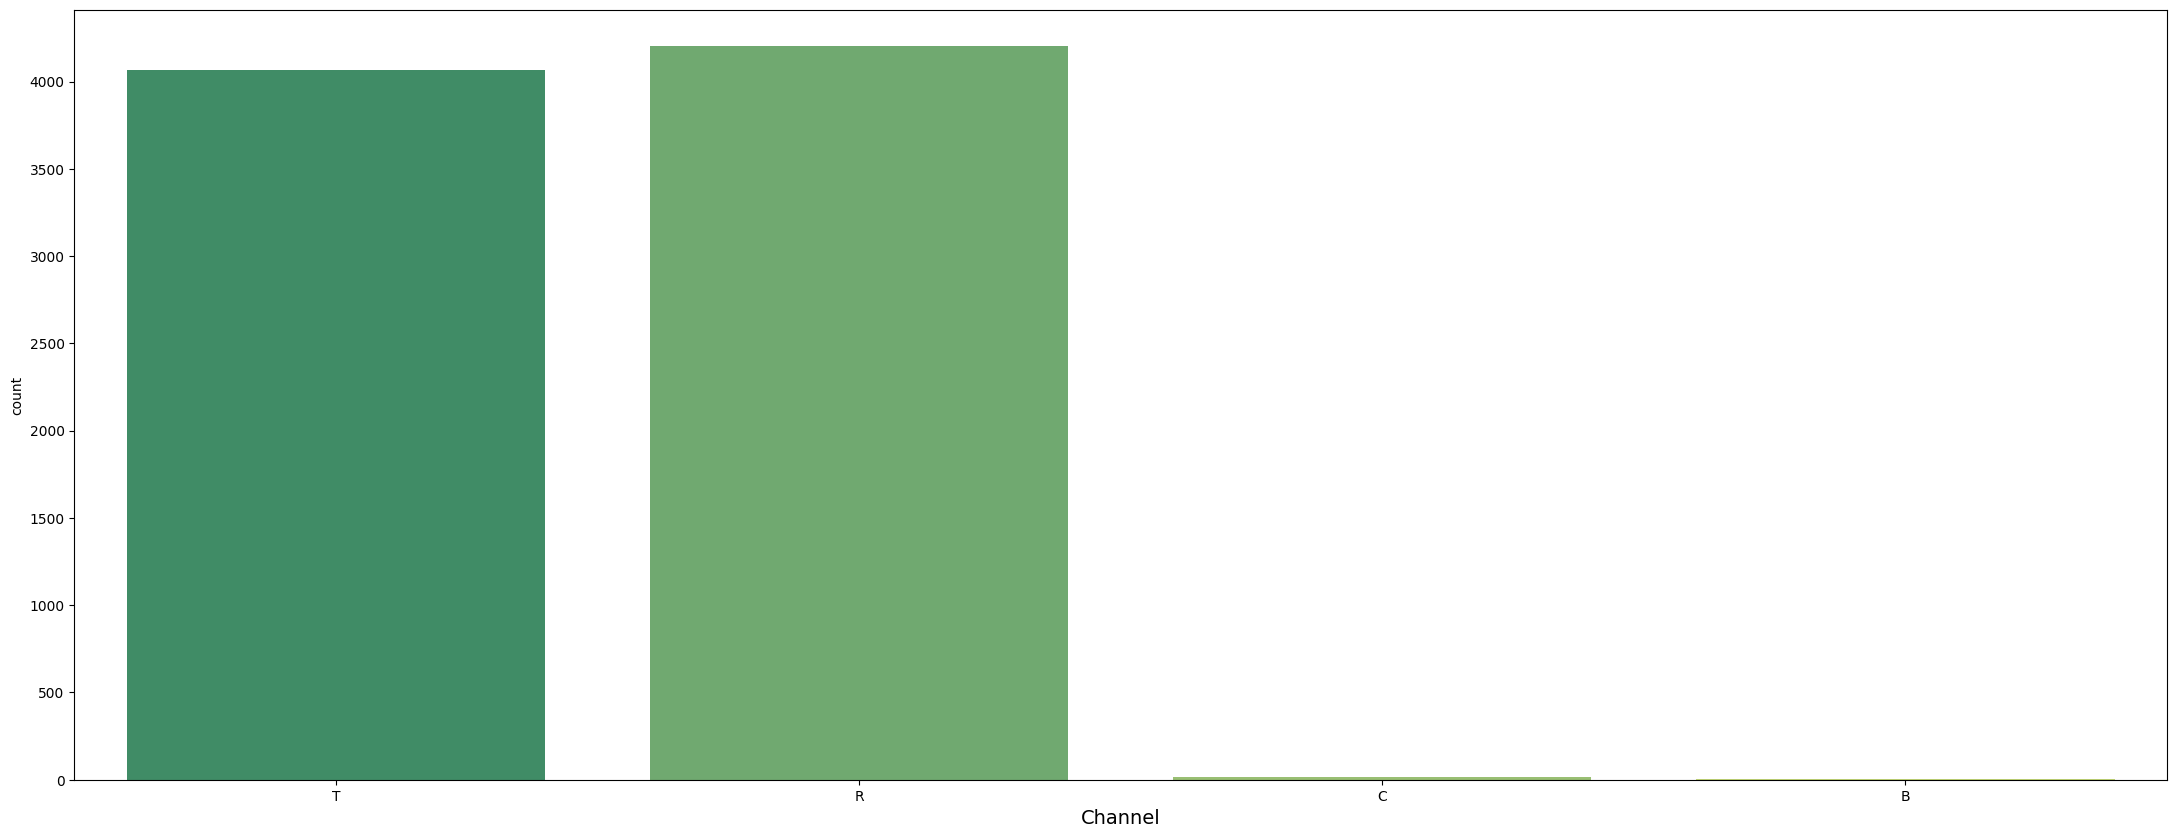

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='Channel' , data=df ,palette='summer')
plt.xlabel('Channel', fontsize=14)
plt.show()

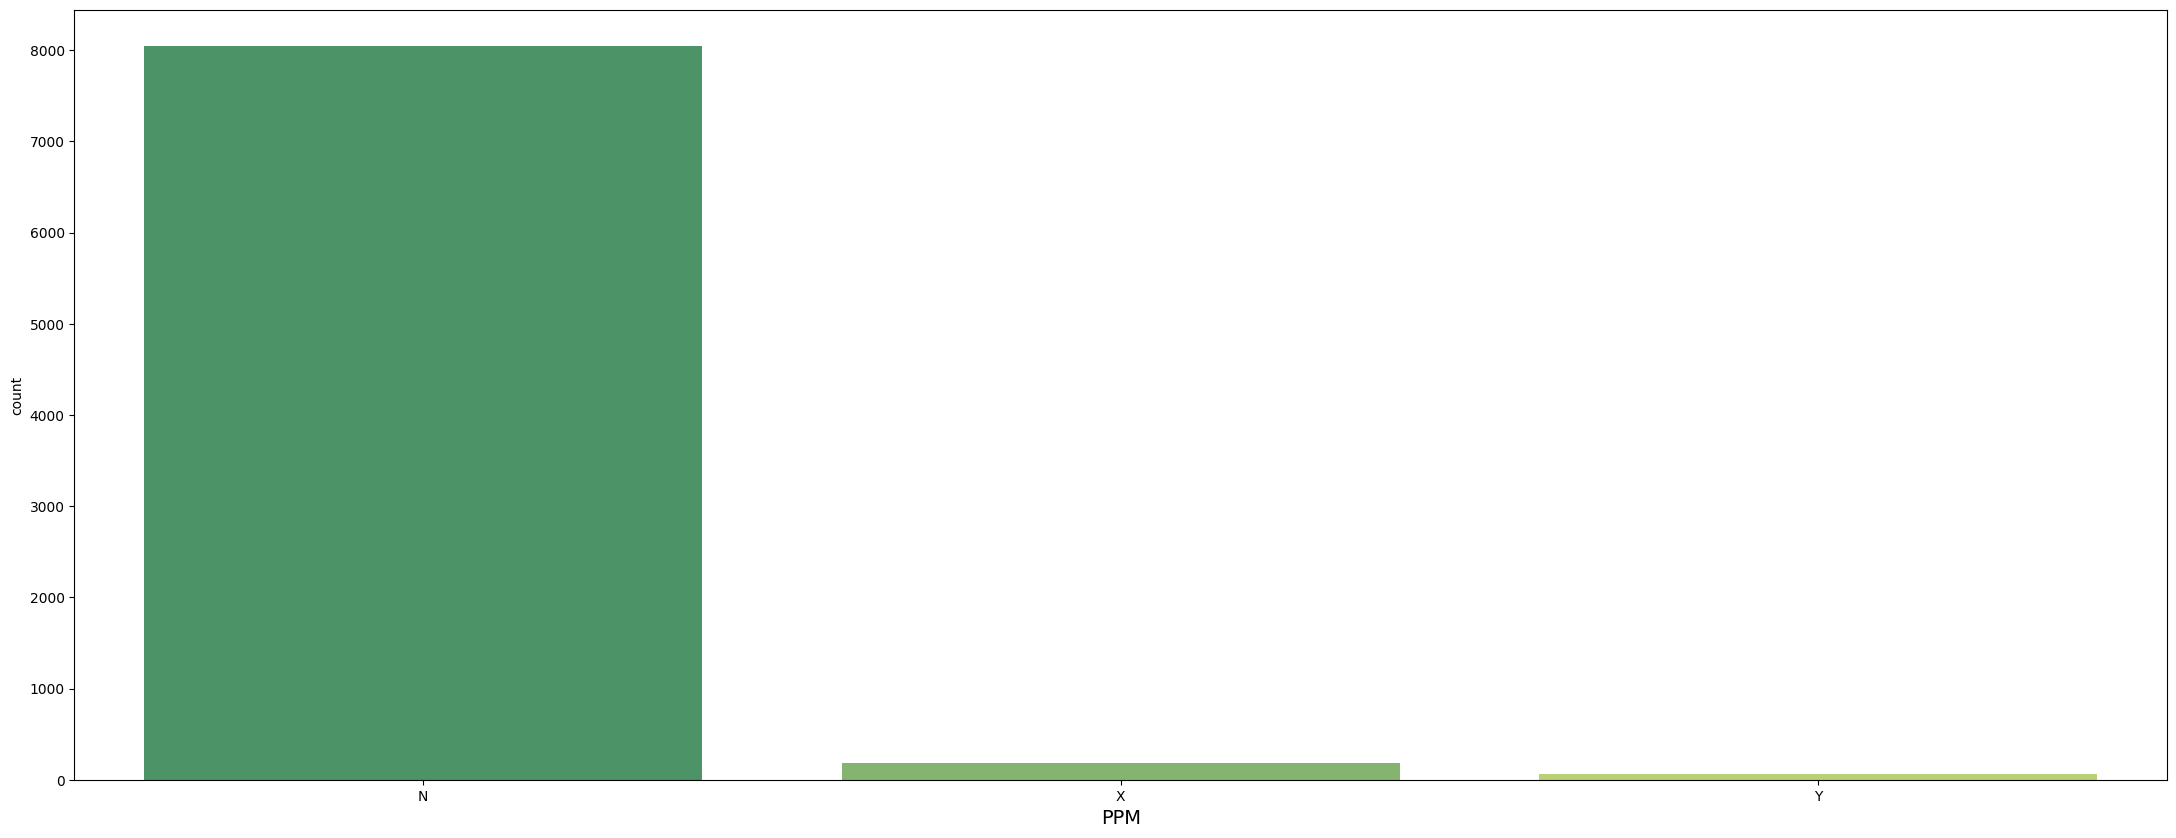

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='PPM' , data=df ,palette='summer')
plt.xlabel('PPM', fontsize=14)
plt.show()


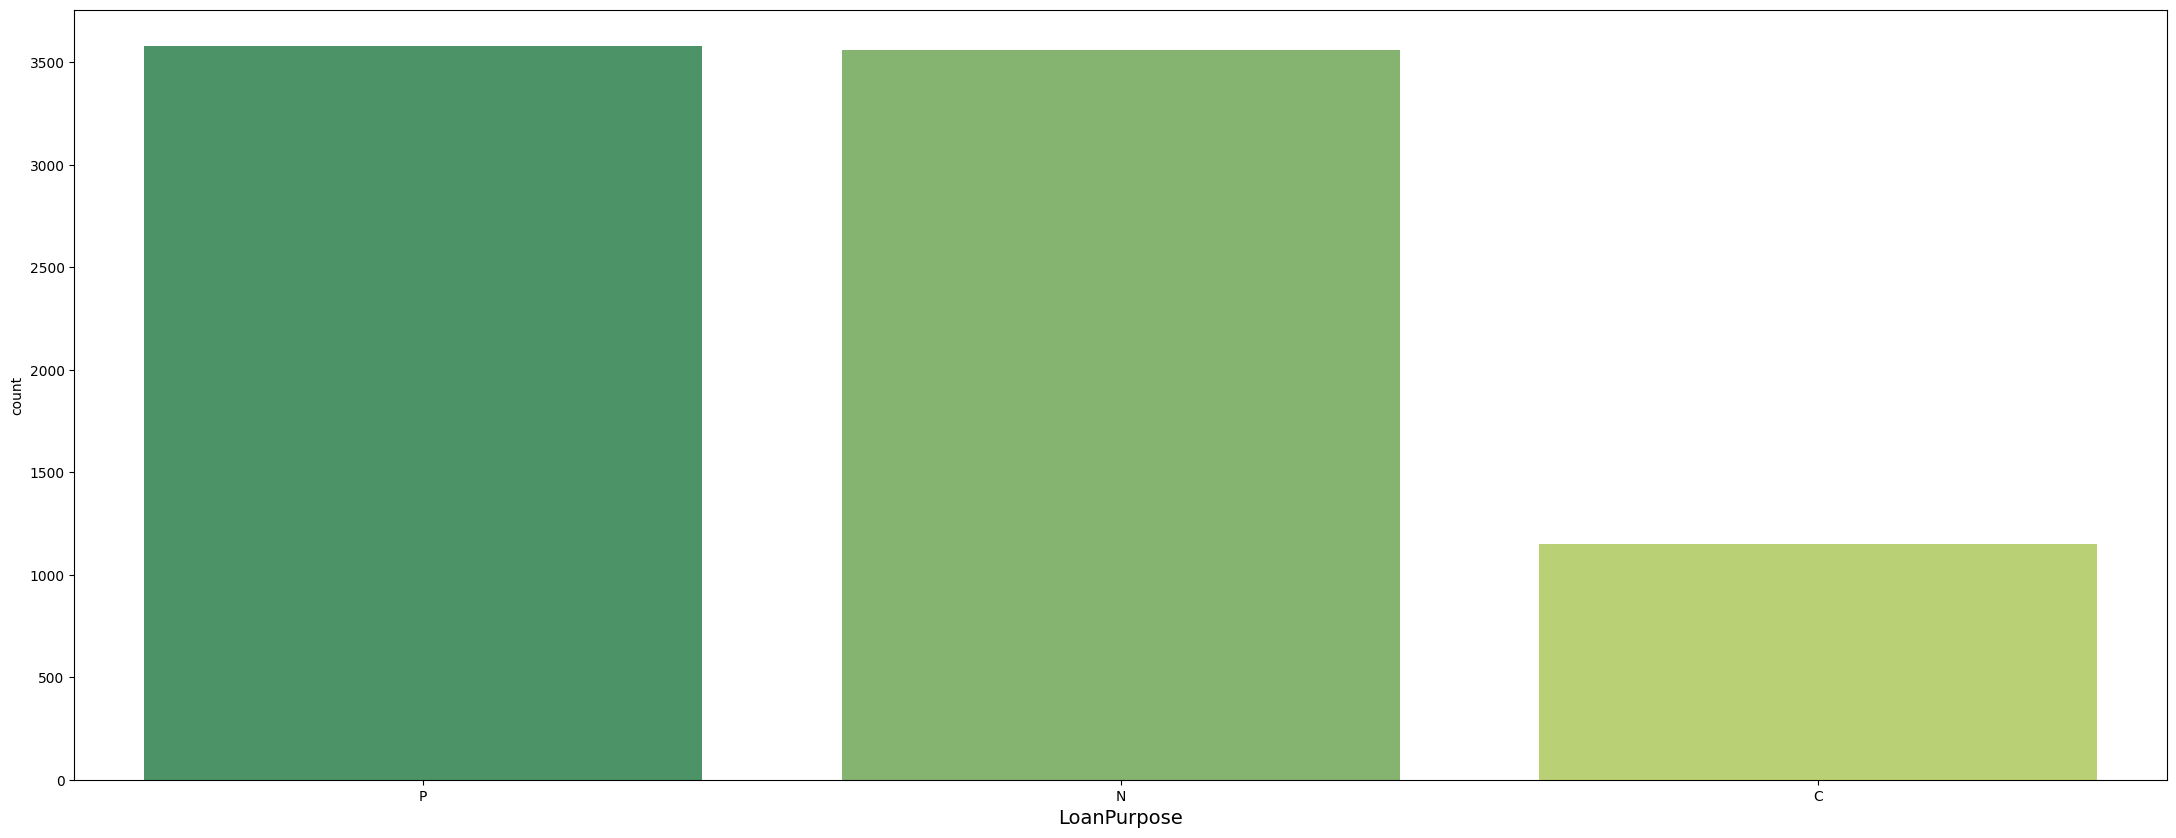

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='LoanPurpose' , data=df ,palette='summer')
plt.xlabel('LoanPurpose', fontsize=14)
plt.show()

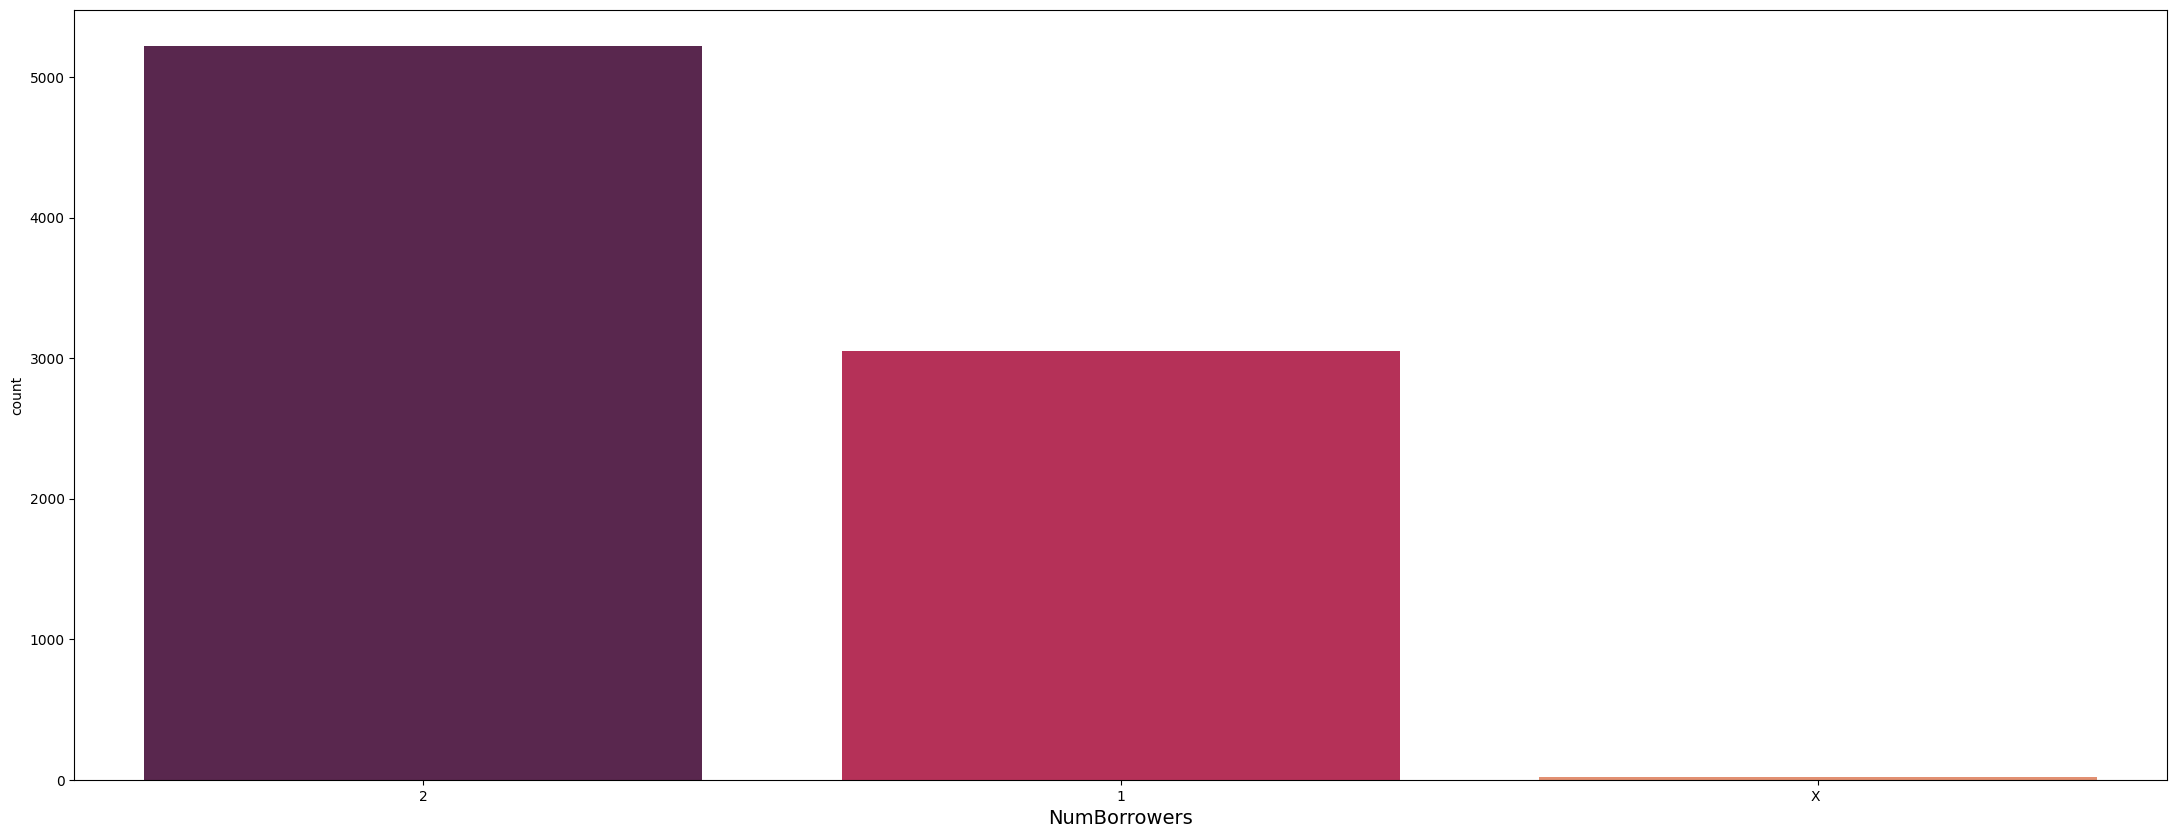

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='NumBorrowers' , data=df ,palette='rocket')
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

## Categarical columns realization:

FirstTimeHomebuyer:Majority of people are not buying home for first time.

Property Time:Single Family are more interested in buying house

Channel:From this column,we get to know that most people are using third party channel.

PPM:Majority of people are not applicable for prepayment penalty payment

LoanPurpose:Loan Purpose of many people is approved and it is purchased



## Numeric Columns

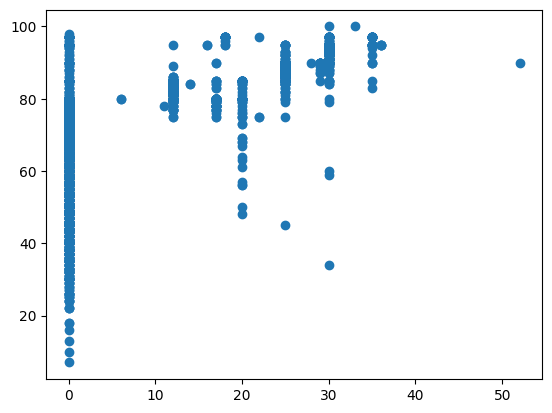

In [ ]:
plt.scatter(df['MIP'],df['LTV'])


<ipython-input-306-5de3862345e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'],color='Orange')


<Axes: xlabel='CreditScore', ylabel='Density'>

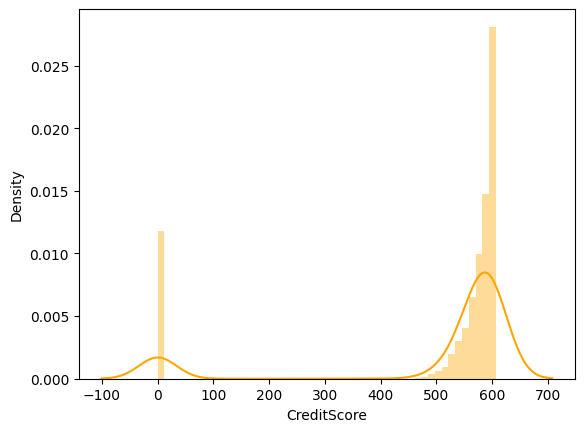

In [ ]:
sns.distplot(df['CreditScore'],color='Orange')

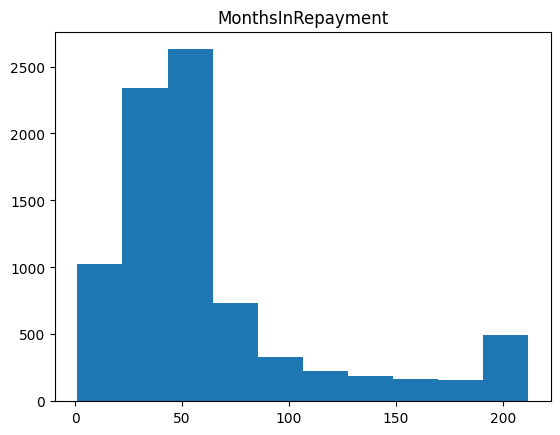

In [ ]:
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

plt.hist(df['MonthsInRepayment'])
plt.title("MonthsInRepayment")
plt.show()

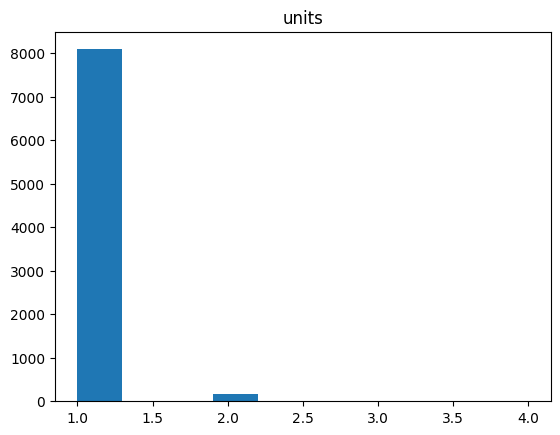

In [ ]:
plt.hist(df['Units'])
plt.title("units")
plt.show()

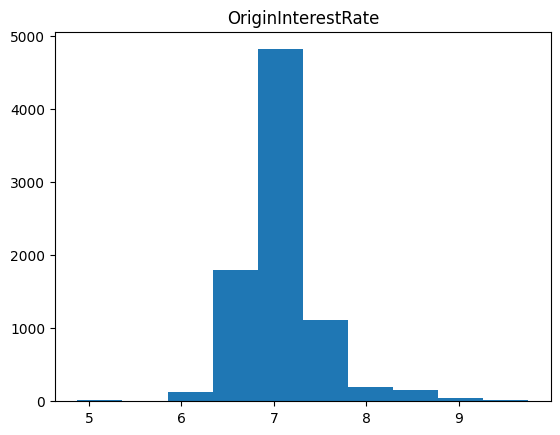

In [ ]:
plt.hist(df['OrigInterestRate'])
plt.title("OriginInterestRate")
plt.show()

In [ ]:
def convert_to_year_month(number):
    year = number // 100
    month = number % 100
    try:
        date_obj = datetime.date(year, month, 1)
        return date_obj.strftime('%Y-%m')
    except ValueError:
        return "Invalid input"


In [ ]:
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(convert_to_year_month)

In [ ]:
df['FirstPaymentDate'].unique()

array(['1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07',
       '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01',
       '2000-04', '2000-05', '2000-06', '2001-05', '2000-09', '2002-04',
       '2003-03', '2002-12', '2000-07', '2000-03', '2002-06', '2000-02',
       '2000-08', '2001-06', '2000-11', '2001-03', '2002-02', '2001-01',
       '2003-04'], dtype=object)

In [ ]:
df['MaturityDate'] = df['MaturityDate'].apply(convert_to_year_month)

In [ ]:
df['MaturityDate'].unique()

array(['2029-01', '2027-10', '2029-02', '2024-09', '2027-02', '2029-03',
       '2026-02', '2026-07', '2029-04', '2026-09', '2029-05', '2029-06',
       '2029-07', '2029-08', '2029-09', '2029-10', '2029-11', '2029-12',
       '2030-03', '2030-04', '2028-04', '2030-08', '2026-11', '2028-03',
       '2027-04', '2025-08', '2030-06', '2030-02', '2025-09', '2027-03',
       '2025-07', '2025-11', '2027-06', '2025-02', '2027-05', '2026-12',
       '2027-01', '2025-04', '2030-01', '2026-10', '2026-01', '2026-06',
       '2026-08', '2030-10', '2027-12', '2028-09', '2027-08', '2025-10',
       '2025-03', '2028-08', '2027-09', '2027-07', '2028-06', '2028-02',
       '2026-05', '2028-11'], dtype=object)

In [ ]:
df[cat].columns


Index(['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM',
       'ProductType', 'PropertyState', 'PropertyType', 'LoanSeqNum',
       'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName'],
      dtype='object')

<ipython-input-316-57dfeb9477ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,cmap='rocket')


<Axes: >

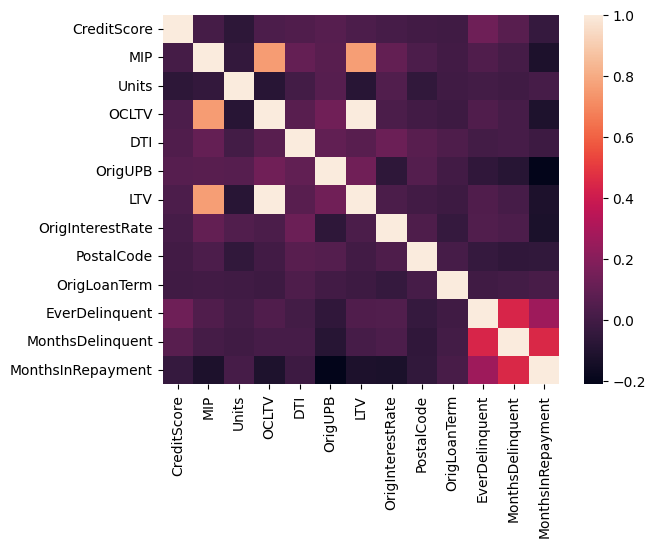

In [ ]:
sns.heatmap(df.corr() ,cmap='rocket')

We can see OCLTV and LTV are highly correlated with MIP

### Feature Engineering

In [ ]:
df=df.drop(['MSA','PropertyState','PostalCode','LoanSeqNum','SellerName','ServicerName'],axis=1)

In [ ]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,Channel,PPM,ProductType,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02,N,2029-01,25,1,O,89,27,117000,...,T,N,FRM,SF,P,360,2,0.0,0.0,52.0
1,0,1999-02,N,2029-01,0,1,O,73,17,109000,...,R,N,FRM,SF,N,360,1,0.0,0.0,144.0
2,0,1999-02,N,2029-01,0,1,O,75,16,88000,...,T,N,FRM,SF,N,360,2,0.0,0.0,67.0
3,0,1999-02,N,2029-01,0,1,O,76,14,160000,...,R,N,FRM,SF,N,360,2,0.0,0.0,35.0
4,0,1999-02,N,2029-01,0,1,O,78,18,109000,...,R,N,FRM,SF,N,360,2,0.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,607,1999-03,X,2029-02,25,1,O,87,14,57000,...,R,N,FRM,SF,N,360,1,1.0,1.0,84.0
8284,607,1999-03,X,2029-02,17,1,O,78,34,102000,...,R,N,FRM,SF,N,360,2,1.0,1.0,45.0
8285,607,1999-03,X,2029-02,25,1,O,88,23,114000,...,R,N,FRM,SF,N,360,2,0.0,0.0,45.0
8286,607,1999-03,X,2029-02,12,1,O,85,26,83000,...,T,N,FRM,SF,N,360,2,0.0,0.0,44.0


In [ ]:
le = LabelEncoder()
Label = ['FirstTimeHomebuyer','Occupancy', 'Channel', 'PPM',
       'ProductType','PropertyType','LoanPurpose', 'NumBorrowers']

for i in Label:
    df[i] = le.fit_transform(df[i])



In [ ]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,Channel,PPM,ProductType,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02,0,2029-01,25,1,1,89,27,117000,...,3,0,0,5,2,360,1,0.0,0.0,52.0
1,0,1999-02,0,2029-01,0,1,1,73,17,109000,...,2,0,0,5,1,360,0,0.0,0.0,144.0
2,0,1999-02,0,2029-01,0,1,1,75,16,88000,...,3,0,0,5,1,360,1,0.0,0.0,67.0
3,0,1999-02,0,2029-01,0,1,1,76,14,160000,...,2,0,0,5,1,360,1,0.0,0.0,35.0
4,0,1999-02,0,2029-01,0,1,1,78,18,109000,...,2,0,0,5,1,360,1,0.0,0.0,54.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8288 non-null   int64  
 1   FirstPaymentDate    8288 non-null   object 
 2   FirstTimeHomebuyer  8288 non-null   int64  
 3   MaturityDate        8288 non-null   object 
 4   MIP                 8288 non-null   int64  
 5   Units               8288 non-null   int64  
 6   Occupancy           8288 non-null   int64  
 7   OCLTV               8288 non-null   int64  
 8   DTI                 8288 non-null   int64  
 9   OrigUPB             8288 non-null   int64  
 10  LTV                 8288 non-null   int64  
 11  OrigInterestRate    8288 non-null   float64
 12  Channel             8288 non-null   int64  
 13  PPM                 8288 non-null   int64  
 14  ProductType         8288 non-null   int64  
 15  PropertyType        8288 non-null   int64  
 16  LoanPu